In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing data from data source in this case its a excel file which we downloaded from kaggle

In [ ]:
dataset=pd.read_csv('flight_data')

In [ ]:
dataset.head(5)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882


Here we go our first step ----> Data Preprocessing part

In [ ]:
dataset.isna().sum() # checking the null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
dataset.dropna(inplace=True) # Droping the null values as it is only a single value

In [ ]:
dataset.duplicated().sum() # Checking of the duplicated values

220

In [ ]:
dataset.drop_duplicates(inplace=True) # There are no benfits of keeping duplicates so drop them

So in Date of journey we need to extract day/month/year

In [ ]:
dataset['day']=pd.to_datetime(dataset['Date_of_Journey']).dt.day
dataset['month']=pd.to_datetime(dataset['Date_of_Journey']).dt.month
dataset['year']=pd.to_datetime(dataset['Date_of_Journey']).dt.year

In [ ]:
dataset.drop(columns={'Date_of_Journey'},inplace=True)

In [ ]:
dataset.head(3)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019


In [ ]:
################# Preprocessing of the Departure Time Extracting Departure Hour and Minz #######################
dataset['Dep_hr']=dataset['Dep_Time'].str.split(':',expand=True)[0].astype(float)
dataset['Dep_Minz']=dataset['Dep_Time'].str.split(':',expand=True)[1].astype(float)
dataset.drop(columns={'Dep_Time'},inplace=True)

In [ ]:
dataset.head(3)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_hr,Dep_Minz
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22.0,20.0
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5.0,50.0
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9.0,25.0


In [ ]:
##################################   Extraction of Arrival_Time  ##################################################
val_1=dataset["Arrival_Time"].str.split(":",expand=True)
dataset['Arrival_hr']=val_1[0]
dataset['Arrival_hr']=dataset['Arrival_hr'].astype(float)
val_2=val_1[1].str.split(' ',expand=True)[0]
dataset['Arrival_minz']=val_2[0]
dataset['Arrival_hr']=dataset['Arrival_hr'].astype(float)

In [ ]:
dataset.drop(columns={'Arrival_Time'},inplace=True)

In [ ]:
dataset.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_hr,Dep_Minz,Arrival_hr,Arrival_minz
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22.0,20.0,1.0,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5.0,50.0,13.0,10
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,9.0,25.0,4.0,10


In [ ]:
################################### Preprocessing the Duration  ##########################################
val_3=dataset['Duration'].str.split(' ',expand=True)
val_3[0].value_counts()
# we encounted a error that a flight duration in hr is 5 min how it is possible so we correct it to 5 hrs
val_3[0]=val_3[0].str.replace('5m','5h')
val_3[0].value_counts()
hours=val_3[0].str.split('h',expand=True)[0]
hours=hours.astype(float)
hours.head(3)

0     2.0
1     7.0
2    19.0
Name: 0, dtype: float64

In [ ]:
# Prepoocessing the Miniutes Compoment
val_3[1].fillna('0m',inplace=True)
val_3[1].str.split('m',expand=True)[0]
minz=val_3[1].str.split('m',expand=True)[0]
minz=minz.astype(float)
minz=minz/60
minz.head(3)

0    0.833333
1    0.416667
2    0.000000
Name: 0, dtype: float64

In [ ]:
dataset['Total_Duration_hrs']=hours+minz

In [ ]:
dataset['Total_Duration_hrs'].head()

0     2.833333
1     7.416667
2    19.000000
3     5.416667
4     4.750000
Name: Total_Duration_hrs, dtype: float64

In [ ]:
dataset.drop(columns={'Duration'},inplace=True)

In [ ]:
dataset.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,month,year,Dep_hr,Dep_Minz,Arrival_hr,Arrival_minz,Total_Duration_hrs
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22.0,20.0,1.0,10,2.833333
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5.0,50.0,13.0,10,7.416667
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9.0,25.0,4.0,10,19.000000


In [ ]:
dataset['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
dataset['Total_Stops']=dataset['Total_Stops'].str.replace('non-stop','0')
dataset['Total_Stops']=dataset['Total_Stops'].str.split(" ",expand=True)[0]
dataset['Total_Stops']=dataset['Total_Stops'].astype(float)

In [ ]:
dataset.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,month,year,Dep_hr,Dep_Minz,Arrival_hr,Arrival_minz,Total_Duration_hrs
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,2019,22.0,20.0,1.0,10,2.833333
1,Air India,Kolkata,Banglore,2.0,No info,7662,1,5,2019,5.0,50.0,13.0,10,7.416667
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,9,6,2019,9.0,25.0,4.0,10,19.000000


In [ ]:
dataset=dataset[["Airline","Source","Destination","day","month","year","Total_Stops","Dep_hr","Dep_Minz","Arrival_hr","Arrival_minz","Total_Duration_hrs","Additional_Info","Price"]]

In [ ]:
dataset.head(3)

,Airline,Source,Destination,day,month,year,Total_Stops,Dep_hr,Dep_Minz,Arrival_hr,Arrival_minz,Total_Duration_hrs,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,24,3,2019,0.0,22.0,20.0,1.0,10,2.833333,No info,3897
1,Air India,Kolkata,Banglore,1,5,2019,2.0,5.0,50.0,13.0,10,7.416667,No info,7662
2,Jet Airways,Delhi,Cochin,9,6,2019,2.0,9.0,25.0,4.0,10,19.000000,No info,13882


In [ ]:
########################################### Lets Move To EDA #######################################################
# How Price Varies with Airlines

# How Price varies with Totla stops

# How Price Varies with Month

# How Price Varies with Departure and arrival Hours

# How Price Varies with Additional Information

# How Duration varies with the price

# Which Source has Maximum number of Flights

# How Number of Flights affects the price from the source

# How do price changes occur with different origins and destinations?

# What is the price difference between Economy and Business class tickets?


In [ ]:
dataset['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [ ]:
# How Price Varies with Airlines
grouped_data=dataset.groupby('Airline')['Price'].mean()
grouped_data

Airline
Air Asia                              5590.260188
Air India                             9556.608028
GoAir                                 5861.056701
IndiGo                                5668.469897
Jet Airways                          11599.021081
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4335.841718
Trujet                                4140.000000
Vistara                               7801.355649
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

In [ ]:
fig=px.bar(grouped_data)
fig.update_layout(xaxis_title='Flights',yaxis_title='Average Price')

In [ ]:
# How Price varies with Totla stops
grouped_data_1=dataset.groupby('Total_Stops')['Price'].mean()
grouped_data_1


Total_Stops
0.0     5018.506763
1.0    10594.123556
2.0    12761.099393
3.0    13260.674419
4.0    17686.000000
Name: Price, dtype: float64

In [ ]:
fig=px.bar(grouped_data_1)
fig.update_layout(xaxis_title='Number of Stops',yaxis_title='Average Price',bargap=0.7)

In [ ]:
grouped_data_2_1=dataset.groupby('month')['Price'].mean()
grouped_data_2_1

month
3    10695.397311
4     5766.545455
5     9029.239764
6     8736.152522
Name: Price, dtype: float64

In [ ]:
fig=px.line(grouped_data_2_1)
fig.update_layout(xaxis_title='Month',yaxis_title='Mean_Price')

In [ ]:
# Which Source has Maximum number of Flights
grouped_data_3=dataset.groupby('Source')['Airline'].count()
grouped_data_3

Source
Banglore    2179
Chennai      381
Delhi       4345
Kolkata     2860
Mumbai       697
Name: Airline, dtype: int64

In [ ]:
fig=px.bar(grouped_data_3)
fig.update_layout(xaxis_title='Source_Name',yaxis_title='Counter')

In [ ]:
grouped_data_4=dataset.groupby('Destination')['Airline'].count()
grouped_data_4

Destination
Banglore     2860
Cochin       4345
Delhi        1265
Hyderabad     697
Kolkata       381
New Delhi     914
Name: Airline, dtype: int64

In [ ]:
fig=px.bar(grouped_data_3)
fig.update_layout(xaxis_title='Destination_Name',yaxis_title='Counter',bargap=0.7)

In [ ]:
# # How Price Varies with Departure and arrival Hours
grouped_data_31=dataset.groupby('Dep_hr')['Price'].mean()
grouped_data_31
fig=px.line(grouped_data_31)
fig.update_layout(title='Variation of Price with Departure Hour',yaxis_title='Mean Price')

In [ ]:
# # # How Price Varies with Departure and arrival Hours
grouped_data_32=dataset.groupby('Arrival_hr')['Price'].mean()
grouped_data_32
fig=px.line(grouped_data_32)
fig.update_layout(title='Variation of Price with Arrival Hour',yaxis_title='Mean Price')

In [ ]:
# # How do price changes occur with different origins and destinations?
grouped_data_33=dataset.groupby('Source')['Price'].mean()
grouped_data_33
fig=px.bar(grouped_data_33)
fig.update_layout(title='Variation of Price with Source',yaxis_title='Mean Price',bargap=0.7)

In [ ]:
grouped_data_39=dataset.groupby('Destination')['Price'].mean()
grouped_data_39
fig=px.bar(grouped_data_39)
fig.update_layout(title='Variation of Price with Destination',yaxis_title='Mean Price',bargap=0.7)

In [ ]:
# What is the price difference between Economy and Business class tickets?
grouped_data_34=dataset.groupby('Additional_Info')['Price'].mean()
grouped_data_34
fig=px.bar(grouped_data_34)
fig.update_layout(title='Variation of Price with Additional Perks',yaxis_title='Mean Price',bargap=0.7)

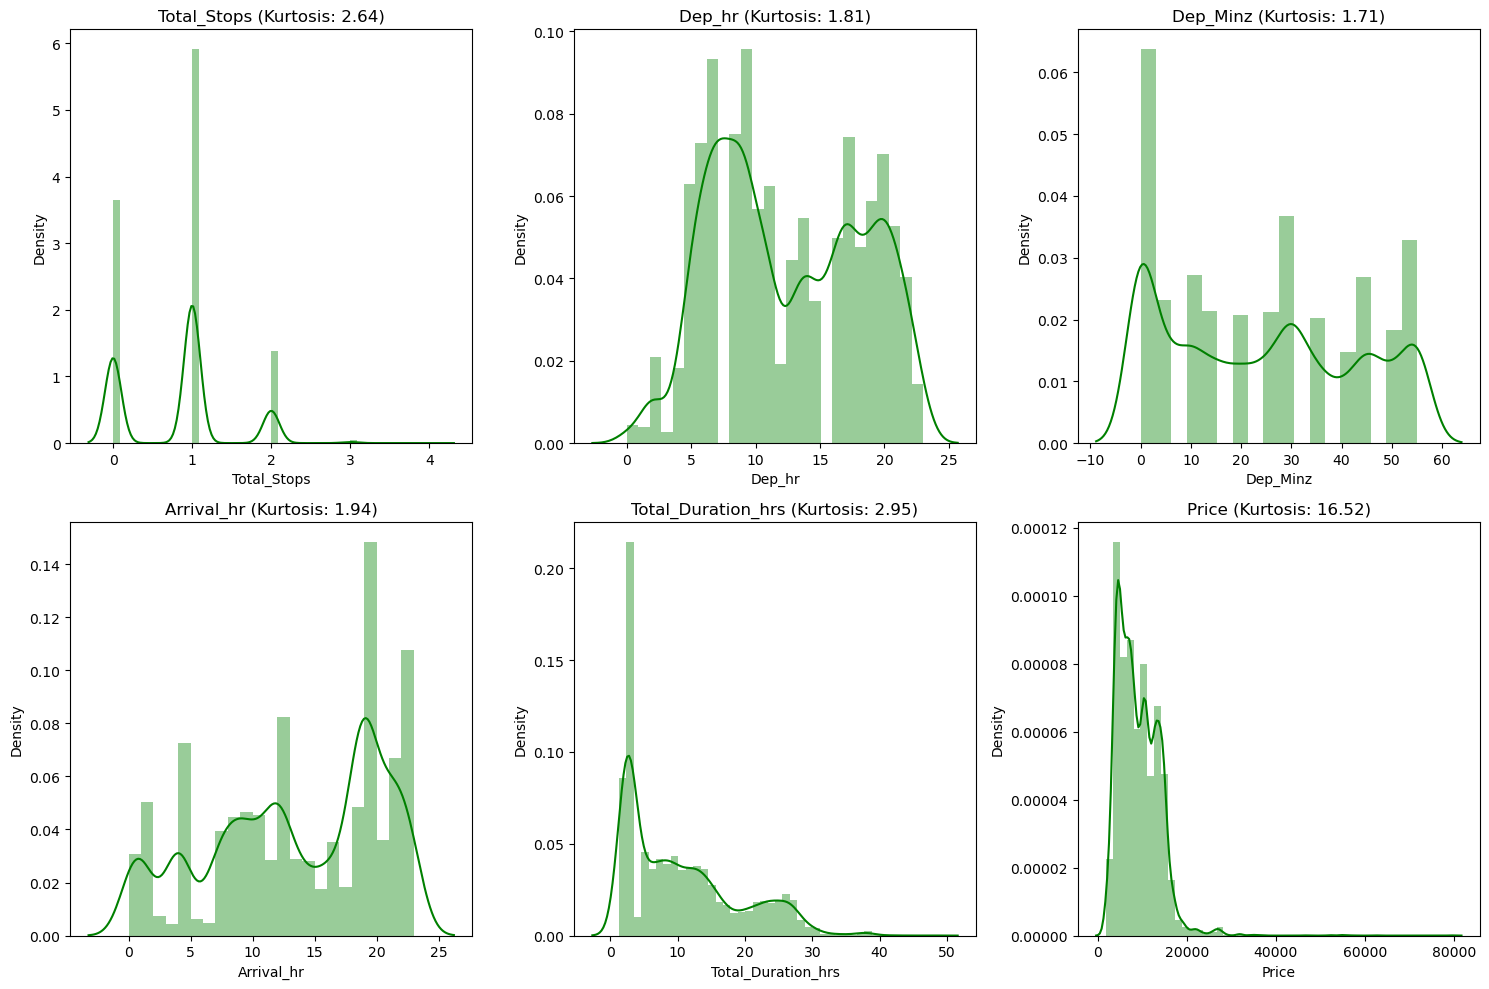

In [ ]:
################################### Stastical Analysis Of all Aspects #######################################
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
def plot_feature_kurtosis(dataset):
    # Select numeric columns
    numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
    # Set the number of rows and columns for the plot grid
    num_plots = len(numeric_columns)
    num_cols = 3  # Number of columns for subplots
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows dynamically
    # Set the figure size
    plt.figure(figsize=(15, 5 * num_rows))
    for i, feature in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        # Calculate kurtosis for the feature
        kurtosis_value = kurtosis(dataset[feature].dropna(), fisher=False)  # fisher=False for regular kurtosis
        # Plot distribution using seaborn's distplot
        sns.distplot(dataset[feature].dropna(), kde=True, color='green')
        plt.title(f'{feature} (Kurtosis: {kurtosis_value:.2f})')
    plt.tight_layout()  # Adjust subplots to fit in the figure area
    plt.show()
plot_feature_kurtosis(dataset)

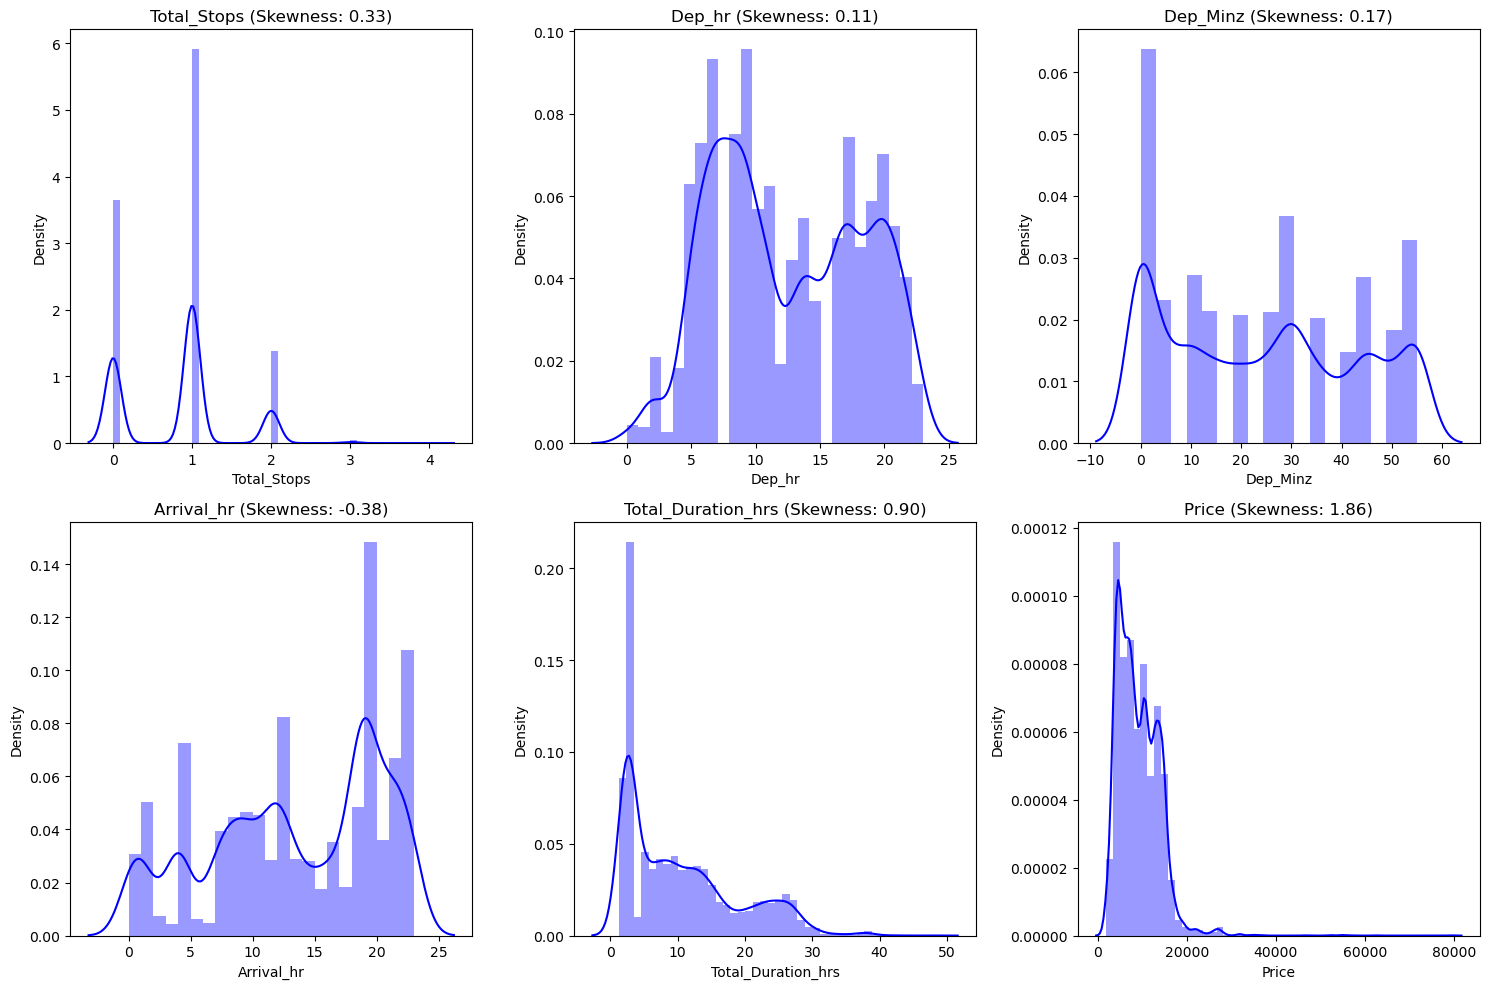

In [ ]:
from scipy.stats import skew
def plot_feature_skewness(dataset):
    # Select numeric columns
    numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

    # Set the number of rows and columns for the plot grid
    num_plots = len(numeric_columns)
    num_cols = 3  # Number of columns for subplots
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows dynamically

    # Set the figure size
    plt.figure(figsize=(15, 5 * num_rows))

    for i, feature in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, num_cols, i)

        # Calculate skewness for the feature
        skewness_value = skew(dataset[feature].dropna())

        # Plot distribution using seaborn's distplot
        sns.distplot(dataset[feature].dropna(), kde=True, color='blue')
        plt.title(f'{feature} (Skewness: {skewness_value:.2f})')

    plt.tight_layout()  # Adjust subplots to fit in the figure area
    plt.show()
plot_feature_skewness(dataset)


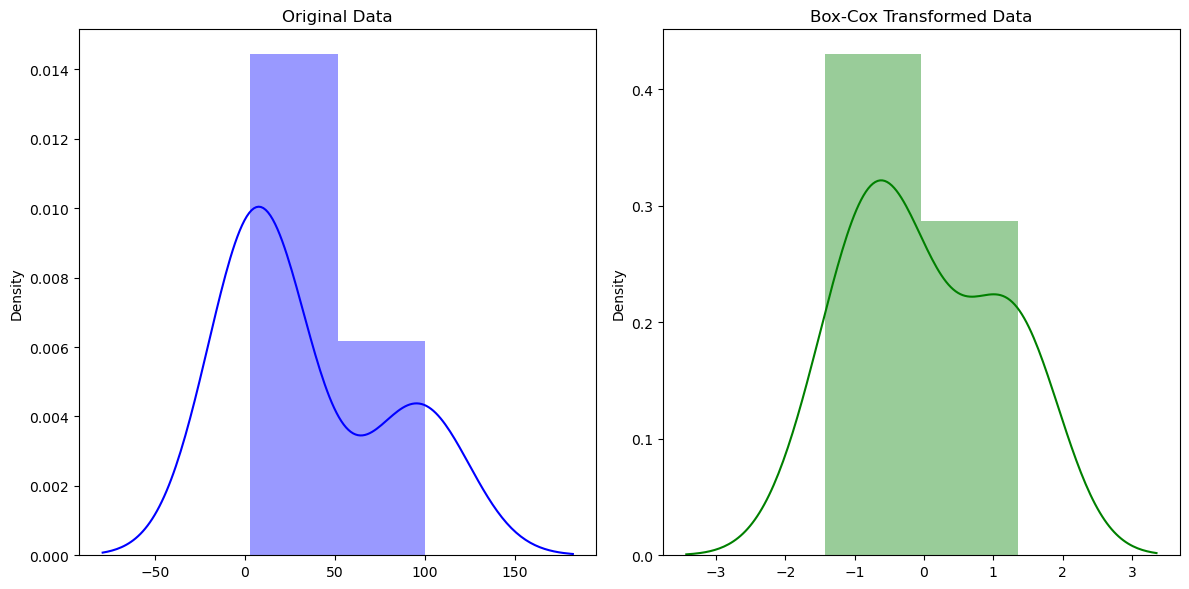

In [ ]:
#################################### How to Handle Skewness and Kurtosis ###################################
################################## Power Transformer is such a method ######################################
'''
The Box-Cox transformation is a statistical technique used to stabilize variance and make a dataset more
normally distributed. It's particularly useful for skewed data and helps make the distribution of features more
symmetrical,
which can improve the performance of machine learning models.
'''
from sklearn.preprocessing import PowerTransformer

# Sample data (positive values only)
data = np.array([100, 20, 3, 4, 5, 6, 7, 8, 90, 100]).reshape(-1, 1)

# Apply Box-Cox transformation
pt = PowerTransformer(method='box-cox')
transformed_data = pt.fit_transform(data)

# Plot the original and transformed data using Seaborn distplot
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(1, 2, 1)
sns.distplot(data, kde=True, color='blue')
plt.title('Original Data')

# Plot transformed data
plt.subplot(1, 2, 2)
sns.distplot(transformed_data, kde=True, color='green')
plt.title('Box-Cox Transformed Data')

plt.tight_layout()
plt.show()


Skewness Before Transformation:


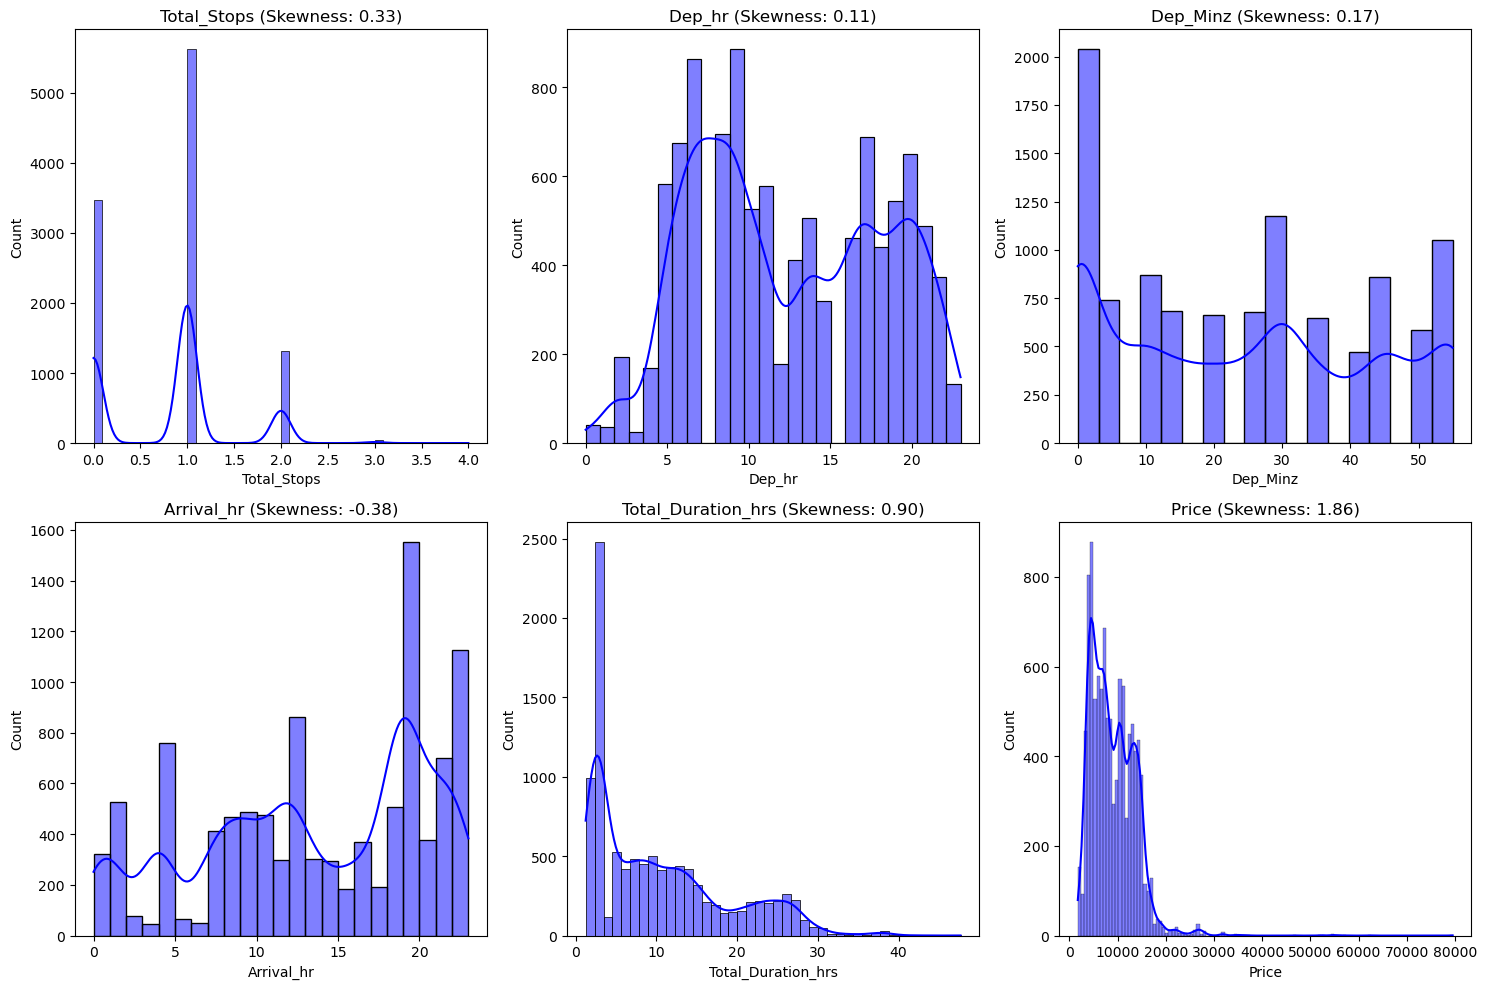

Skipping Total_Stops due to non-positive values.
Skipping Dep_hr due to non-positive values.
Skipping Dep_Minz due to non-positive values.
Skipping Arrival_hr due to non-positive values.
Skewness After Transformation:


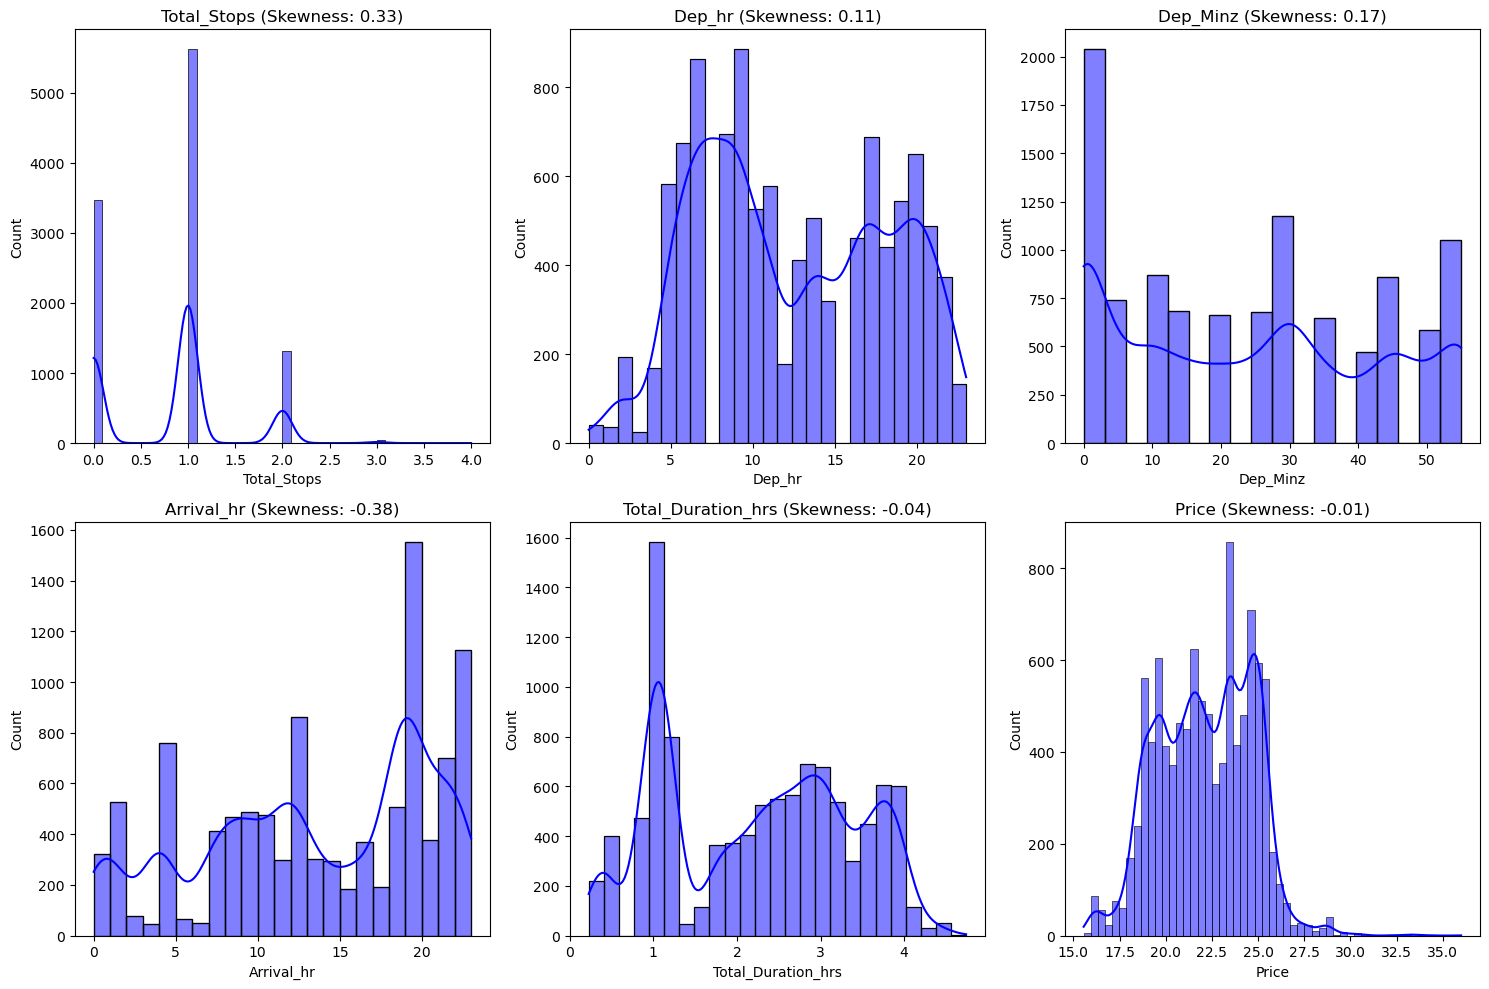

In [ ]:
from scipy.stats import skew, boxcox
from scipy.special import inv_boxcox

def plot_feature_skewness(dataset, transformed=False):
    # Select numeric columns
    numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

    # Set the number of rows and columns for the plot grid
    num_plots = len(numeric_columns)
    num_cols = 3  # Number of columns for subplots
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows dynamically

    # Set the figure size
    plt.figure(figsize=(15, 5 * num_rows))

    for i, feature in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, num_cols, i)

        # Calculate skewness for the feature
        skewness_value = skew(dataset[feature].dropna())

        # Plot distribution using seaborn's distplot
        sns.histplot(dataset[feature].dropna(), kde=True, color='blue')
        plt.title(f'{feature} (Skewness: {skewness_value:.2f})')

    plt.tight_layout()  # Adjust subplots to fit in the figure area
    plt.show()

def apply_boxcox_transform(dataset):
    # Create a copy of the dataset to avoid modifying the original
    transformed_dataset = dataset.copy()

    # Apply Box-Cox transformation to numeric columns
    for feature in transformed_dataset.select_dtypes(include=['float64', 'int64']).columns:
        # Only apply to positive data
        if (transformed_dataset[feature] <= 0).any():
            print(f"Skipping {feature} due to non-positive values.")
            continue
        transformed_dataset[feature], _ = boxcox(transformed_dataset[feature].dropna())

    return transformed_dataset

# Plot skewness before transformation
print("Skewness Before Transformation:")
plot_feature_skewness(dataset)

# Apply Box-Cox transformation
transformed_dataset = apply_boxcox_transform(dataset)

# Plot skewness after transformation
print("Skewness After Transformation:")
plot_feature_skewness(transformed_dataset)


In [ ]:
######################################### Handling Outliers #######################################################
# Calculate Q1, Q3, and IQR
q1 = dataset['Price'].quantile(0.25)
q3 = dataset['Price'].quantile(0.75)
IQR = q3 - q1

# Calculate lower and upper bounds
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Filter out the outliers
filtered_dataset = dataset[(dataset['Price'] >= lower_bound) & (dataset['Price'] <= upper_bound)]

# Create box plot with outliers
fig_with_outliers = px.box(dataset, y='Price', title='Box Plot of Price (With Outliers)')
fig_with_outliers.show()

# Create box plot without outliers
fig_without_outliers = px.box(filtered_dataset, y='Price', title='Box Plot of Price (Without Outliers)')
fig_without_outliers.show()


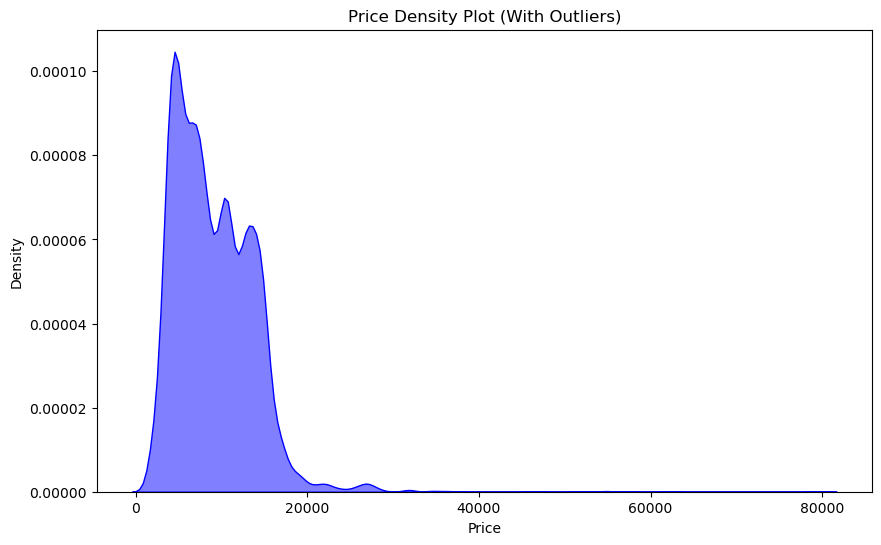

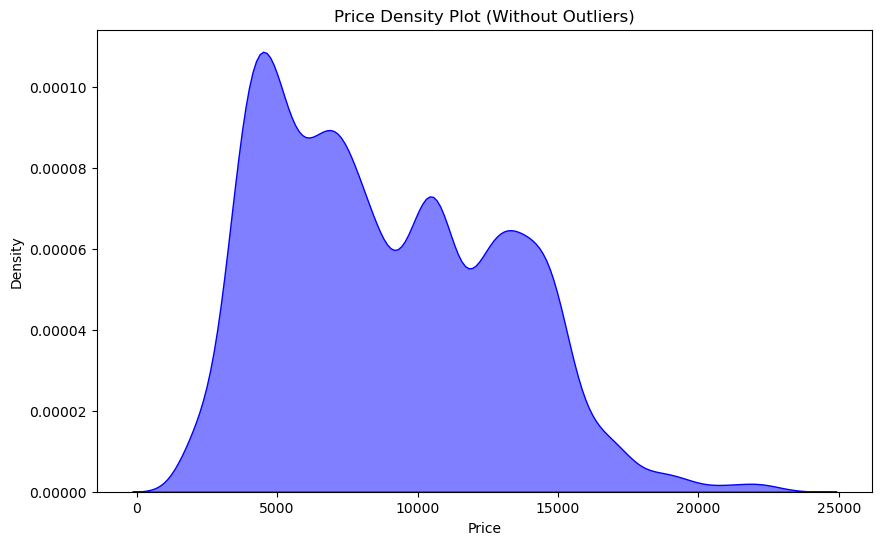

In [ ]:
# KDE plot with outliers
plt.figure(figsize=(10, 6))
sns.kdeplot(data=dataset['Price'], color='blue', fill=True, alpha=0.5)
plt.title('Price Density Plot (With Outliers)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# KDE plot without outliers
plt.figure(figsize=(10, 6))
sns.kdeplot(data=filtered_dataset['Price'], color='blue', fill=True, alpha=0.5)
plt.title('Price Density Plot (Without Outliers)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


In [ ]:
###################################### Best strategy is to Remove Outliers #################################
dataset=filtered_dataset
dataset.shape

(10368, 14)

In [ ]:
dataset.head()

,Airline,Source,Destination,day,month,year,Total_Stops,Dep_hr,Dep_Minz,Arrival_hr,Arrival_minz,Total_Duration_hrs,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,24,3,2019,0.0,22.0,20.0,1.0,10,2.833333,No info,3897
1,Air India,Kolkata,Banglore,1,5,2019,2.0,5.0,50.0,13.0,10,7.416667,No info,7662
2,Jet Airways,Delhi,Cochin,9,6,2019,2.0,9.0,25.0,4.0,10,19.000000,No info,13882
3,IndiGo,Kolkata,Banglore,12,5,2019,1.0,18.0,5.0,23.0,10,5.416667,No info,6218
4,IndiGo,Banglore,New Delhi,1,3,2019,1.0,16.0,50.0,21.0,10,4.750000,No info,13302


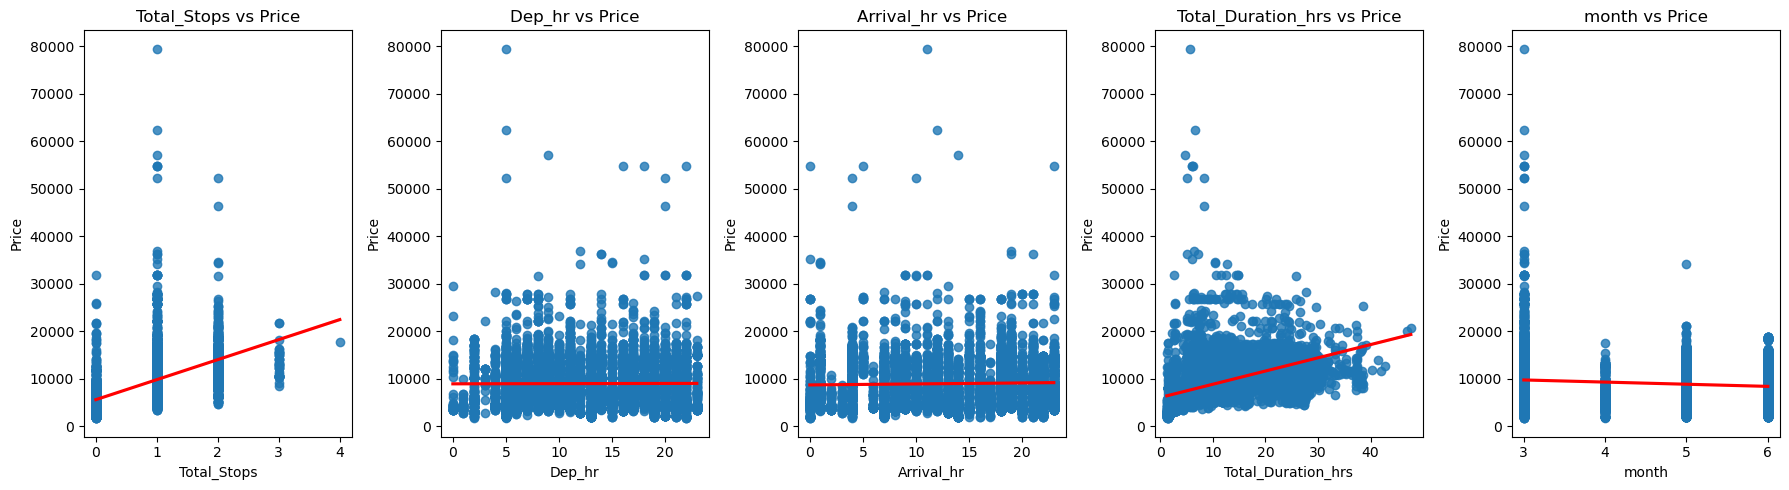

In [ ]:
import matplotlib.pyplot as plt
def plot_regression_plots(dataset, variables, target):
    fig, axes = plt.subplots(1, len(variables), figsize=(18, 5))
    for i, var in enumerate(variables):
        sns.regplot(x=dataset[var], y=dataset[target], ax=axes[i], line_kws={'color': 'red'})
        axes[i].set_title(f'{var} vs {target}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel(target)
    plt.tight_layout()
    plt.show()
plot_regression_plots(dataset, ['Total_Stops', 'Dep_hr', 'Arrival_hr','Total_Duration_hrs','month'], 'Price')


In [ ]:
X = dataset.drop(columns=["Price"])
y = dataset["Price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
categorical_features = ["Airline", "Source", "Destination"]
numerical_features = ["day", "month", "year", "Total_Stops", "Dep_hr", "Dep_Minz", "Arrival_hr", "Arrival_minz", "Total_Duration_hrs"]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", PowerTransformer(), numerical_features),
        ("cat", OneHotEncoder(), categorical_features)
    ]
)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge

In [ ]:
# Define models with hyperparameters to tune
def define_model(trial):
    model_name = trial.suggest_categorical("model", ["Linear Regression", "Ridge", "Random Forest", "XGBoost"])

    if model_name == "Linear Regression":
        model = LinearRegression()

    elif model_name == "Ridge":
        alpha = trial.suggest_loguniform('ridge_alpha', 1e-3, 10.0)
        model = Ridge(alpha=alpha)

    elif model_name == "Random Forest":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        max_depth = trial.suggest_int("max_depth", 3, 20)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)

    elif model_name == "XGBoost":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        learning_rate = trial.suggest_loguniform("learning_rate", 1e-3, 0.3)
        max_depth = trial.suggest_int("max_depth", 3, 20)
        reg_lambda = trial.suggest_loguniform("reg_lambda", 1e-3, 10.0)
        model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, reg_lambda=reg_lambda, random_state=42)

    return model


In [ ]:
# Store training and testing errors
train_errors = []
test_errors = []


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Modify the objective function to return both MSE and R²
def objective(trial):
    model = define_model(trial)

    # Define the pipeline
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on training and testing sets
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate MSE for both training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Calculate R² for the test set
    test_r2 = r2_score(y_test, y_test_pred)

    # Store errors for plotting later
    train_errors.append(train_mse)
    test_errors.append(test_mse)

    # Return both MSE and R² for multi-objective optimization
    return test_mse, test_r2

In [ ]:
import optuna
study = optuna.create_study(directions=["minimize", "maximize"])  # Multi-objective: minimize MSE, maximize R²
study.optimize(objective, n_trials=3350)  # Adjust n_trials as needed more number is Preffered

[I 2024-10-15 10:28:11,684] A new study created in memory with name: no-name-32a7c539-050f-49f4-b575-544c231bba5a
[I 2024-10-15 10:28:12,637] Trial 0 finished with values: [3770945.2857516003, 0.7716707673546135] and parameters: {'model': 'XGBoost', 'n_estimators': 195, 'learning_rate': 0.07419330277933696, 'max_depth': 11, 'reg_lambda': 0.001509337281314714}.
[I 2024-10-15 10:28:14,075] Trial 1 finished with values: [13987208.641962854, 0.15308009688245783] and parameters: {'model': 'XGBoost', 'n_estimators': 83, 'learning_rate': 0.0012540995422303536, 'max_depth': 19, 'reg_lambda': 0.037298636447191724}.
[I 2024-10-15 10:28:15,805] Trial 2 finished with values: [10623416.936619354, 0.35675634266678624] and parameters: {'model': 'XGBoost', 'n_estimators': 279, 'learning_rate': 0.0010518505045633364, 'max_depth': 16, 'reg_lambda': 1.1646128066903858}.
[I 2024-10-15 10:28:15,920] Trial 3 finished with values: [6047710.481963108, 0.6338135430323881] and parameters: {'model': 'Ridge', 'ri

In [ ]:
best_trials = study.best_trials
best_trials

[FrozenTrial(number=2900, state=1, values=[2595875.1504795062, 0.8428207952547694], datetime_start=datetime.datetime(2024, 10, 15, 11, 13, 40, 618749), datetime_complete=datetime.datetime(2024, 10, 15, 11, 13, 40, 826576), params={'model': 'XGBoost', 'n_estimators': 144, 'learning_rate': 0.08104452373487034, 'max_depth': 7, 'reg_lambda': 0.4439834589956169}, user_attrs={}, system_attrs={'nsga2:generation': 58}, intermediate_values={}, distributions={'model': CategoricalDistribution(choices=('Linear Regression', 'Ridge', 'Random Forest', 'XGBoost')), 'n_estimators': IntDistribution(high=300, log=False, low=50, step=1), 'learning_rate': FloatDistribution(high=0.3, log=True, low=0.001, step=None), 'max_depth': IntDistribution(high=20, log=False, low=3, step=1), 'reg_lambda': FloatDistribution(high=10.0, log=True, low=0.001, step=None)}, trial_id=2900, value=None)]

In [ ]:
# Initialize variables to track the best model based on specific criteria
best_trial = None
best_mse = float("inf")
best_r2 = float("-inf")
best_model_name = ""


In [ ]:
# Iterate over the best trials
for trial in best_trials:
    mse = trial.values[0]  # First value is MSE
    r2 = trial.values[1]   # Second value is R² score

    # Select the trial with the lowest MSE and highest R² score
    if (mse < best_mse) or (mse == best_mse and r2 > best_r2):
        best_mse = mse
        best_r2 = r2
        best_trial = trial
        best_model_name = trial.params["model"]

In [ ]:
# Print the best model details
print(f"Best Model: {best_model_name}")
print(f"Best MSE: {best_mse}")
print(f"Best R² Score: {best_r2}")

Best Model: XGBoost
Best MSE: 2595875.1504795062
Best R² Score: 0.8428207952547694


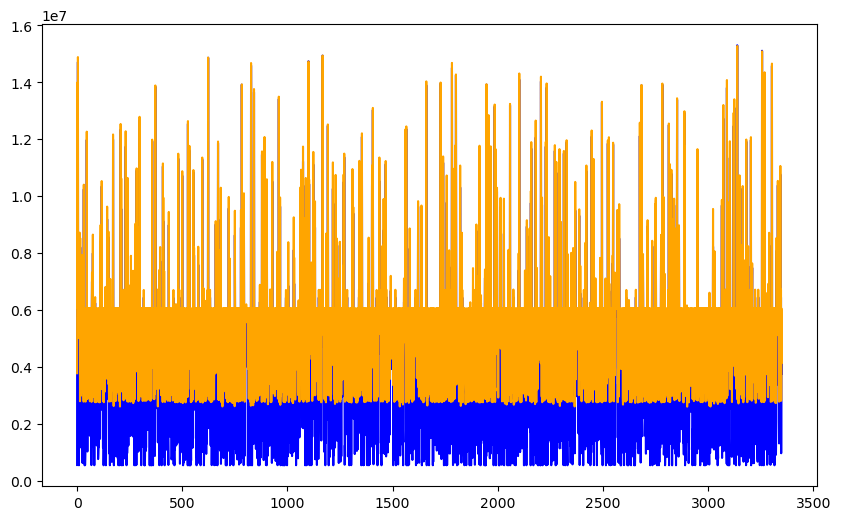

In [ ]:
# Plot training vs testing error
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_errors)), train_errors, label="Training Error", color="blue")
plt.plot(range(len(test_errors)), test_errors, label="Testing Error", color="orange")


In [ ]:
pipeline_1 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", define_model(best_trial))  # Use the best trial to define the model
])

In [ ]:
# Fit the pipeline with training data
pipeline_1.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', PowerTransformer(),
                                                  ['day', 'month', 'year',
                                                   'Total_Stops', 'Dep_hr',
                                                   'Dep_Minz', 'Arrival_hr',
                                                   'Arrival_minz',
                                                   'Total_Duration_hrs']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Airline', 'Source',
                                                   'Destination'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, co...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.08104452373487034, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=144, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [ ]:
# Predict on the test set
y_test_pred = pipeline_1.predict(X_test)

In [ ]:
# Predict on the training set
y_train_pred = pipeline_1.predict(X_train)

# Calculate MSE and R² for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate MSE and R² for the test set
test_mse_final = mean_squared_error(y_test, y_test_pred)
test_r2_final = r2_score(y_test, y_test_pred)

# Print results
print(f"Training Set MSE: {train_mse:.2f}")
print(f"Training Set R² Score: {train_r2:.2f}")
print(f"Testing Set MSE: {test_mse_final:.2f}")
print(f"Testing Set R² Score: {test_r2_final:.2f}")


Training Set MSE: 1359953.37
Training Set R² Score: 0.92
Testing Set MSE: 2595875.15
Testing Set R² Score: 0.84


In [ ]:
# Show some sample predictions
sample_predictions = pd.DataFrame({
    "Actual Price": y_test,
    "Predicted Price": y_test_pred
}).head()

In [ ]:
print("\nSample Predictions (Actual vs Predicted Prices):")
print(sample_predictions)


Sample Predictions (Actual vs Predicted Prices):
       Actual Price  Predicted Price
1833          13941     11398.018555
322            3841      3897.795410
7477           5911      5631.043945
8255           6121      5790.068848
10350          7662      7548.082520


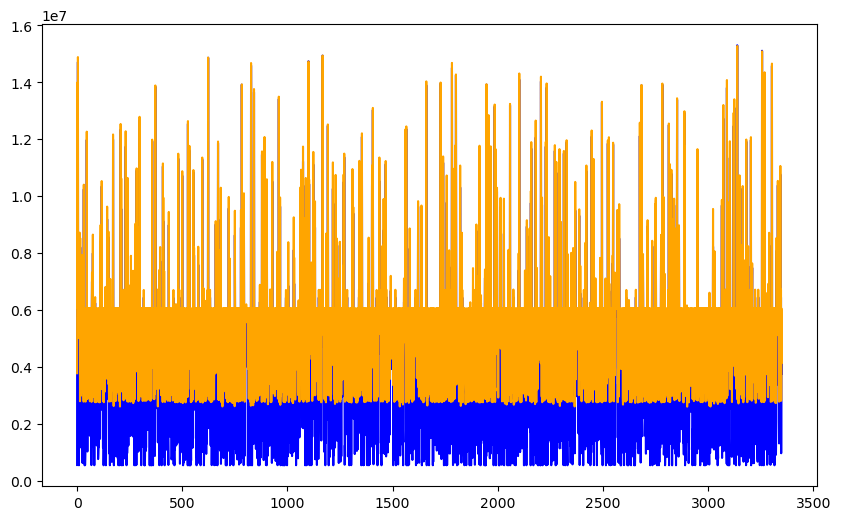

In [ ]:
# Plot training vs testing error
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_errors)), train_errors, label="Training Error", color="blue")
plt.plot(range(len(test_errors)), test_errors, label="Testing Error", color="orange")

In [ ]:
# New data point for prediction (example data )
new_data = pd.DataFrame({
    "Airline": ["IndiGo"],  # Example airline, change if needed
    "Source": ["Mumbai"],  # Example source, change if needed
    "Destination": ["New Delhi"],  # Example destination, change if needed
    "day": [10],  # Example day
    "month": [11],  # Set month to 8 for the prediction
    "year": [2024],  # Example year
    "Total_Stops": [0],  # Example stop count
    "Dep_hr": [5.0],  # Example departure hour
    "Dep_Minz": [0.0],  # Example departure minutes
    "Arrival_hr": [7.0],  # Example arrival hour
    "Arrival_minz": [0],  # Example arrival minutes
    "Total_Duration_hrs": [2.04],  # Example total duration
    "Additional_Info": ["No info"]  # Additional info
})
# Use the pipeline from the best model to predict
predicted_price = pipeline_1.predict(new_data)
# Output the predicted price
print(f"Predicted Price : {predicted_price[0]:.2f}")


Predicted Price : 5686.31
